In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data preprocessing

In [7]:
import numpy as np
import pandas as pd
import math
from tqdm import tqdm

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

## 1) Load data

### (1) Punching

- y : 2

In [8]:
punching_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/punching_sliding.csv'

In [9]:
df_punching = pd.read_csv(punching_path)

df_punching.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,290.693,161.699,307.602,207.250,285.384,205.939,275.033,250.267,265.938,286.746,331.090,211.121,337.569,259.385,327.208,295.910,286.718,291.991,291.966,354.547,289.371,401.517,318.035,294.563,328.432,358.453,337.620,419.732,290.661,158.996,298.499,160.267,0.0,0.0,317.984,164.255,2
1,290.692,161.703,307.593,205.975,284.154,204.656,275.023,250.258,265.927,286.758,331.096,211.115,337.552,263.272,325.892,298.512,285.515,291.992,291.964,354.542,289.346,401.530,318.033,294.569,328.429,358.463,337.624,420.964,290.662,159.004,298.495,160.273,0.0,0.0,317.984,164.251,2
2,291.954,161.696,307.587,207.241,284.136,204.675,275.016,251.537,265.938,286.740,331.109,211.125,337.554,263.290,325.854,298.535,285.498,291.992,291.975,354.535,289.367,401.528,318.019,294.574,328.420,358.453,337.624,420.957,290.669,158.995,298.510,160.266,0.0,0.0,317.990,164.251,2
3,290.694,161.694,307.602,207.250,284.168,205.932,275.020,251.551,265.923,286.781,331.107,211.127,337.545,263.302,325.848,299.779,285.515,293.261,291.966,354.561,289.356,401.517,318.030,294.579,328.419,358.455,337.629,420.955,290.658,158.992,298.504,160.261,0.0,0.0,316.802,164.252,2
4,290.694,161.683,307.600,207.254,284.173,205.931,275.016,251.550,265.919,286.792,331.101,211.132,337.561,263.289,325.891,299.781,286.713,293.268,291.954,354.529,289.358,401.508,318.028,294.586,328.429,358.462,337.632,420.970,290.667,158.981,298.509,160.255,0.0,0.0,317.985,164.270,2


### (2) Smoking

- y : 1

In [10]:
smoking_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/smoking_sliding.csv'

In [11]:
df_smoking = pd.read_csv(smoking_path)

df_smoking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,333.770000,85.241778,324.893667,117.939111,305.293000,119.228000,295.470667,162.394222,297.418667,201.668889,341.613333,116.635111,351.406667,154.591556,349.486667,132.359556,309.233000,204.285778,303.348000,267.131556,302.326000,323.346222,333.786667,204.287556,332.769000,267.078667,326.903333,320.686222,330.772000,78.676444,337.650000,78.681778,951.296,180.159,0.0,0.0,1
1,333.790000,85.257778,324.900667,117.922667,306.279667,119.208000,295.499333,162.396889,297.438667,202.923111,341.596667,116.629778,352.383333,153.326222,349.453333,129.706667,309.247667,204.291111,304.301000,267.088000,302.311000,323.341333,333.783333,204.279111,332.776000,267.048444,327.850000,319.456000,330.793667,78.677333,338.630000,78.707111,954.022,180.145,0.0,0.0,1
2,334.726667,86.532000,324.929333,117.944444,307.238000,119.218222,295.492333,162.445333,297.437000,203.006222,342.553333,116.648000,356.276667,153.281333,349.423333,127.101333,309.245000,204.280444,304.305333,267.110667,302.328333,323.337333,333.783333,204.265333,332.779667,267.073778,327.848000,319.466667,331.762333,78.708889,339.593333,78.735111,954.154,180.149,0.0,0.0,1
3,334.750000,86.560000,325.887000,116.626667,308.246000,117.935111,296.467333,161.117333,296.472000,201.634222,344.516667,115.312889,356.326667,153.299111,349.396667,125.814222,309.236667,203.004889,304.324333,267.065333,302.322000,322.046222,334.706667,203.014222,332.779000,267.043111,327.851000,320.692000,331.787000,78.740889,339.616667,78.747556,954.270,183.041,0.0,0.0,1
4,335.693333,86.576000,325.897333,116.635556,309.174667,117.969778,296.454333,161.153778,296.440000,201.635556,344.510000,114.017778,357.293333,153.281778,348.490000,121.908000,309.245667,202.997778,306.263000,265.787556,302.312667,322.045333,334.703333,203.001333,332.793667,265.820000,326.898667,320.699556,332.704000,78.756000,340.543333,78.752889,957.030,183.052,0.0,0.0,1


### (3) Walking

- y : 0

In [12]:
walking_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/walking_sliding.csv'

In [13]:
df_walking = pd.read_csv(walking_path)

df_walking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,2.591563,268.375111,34.471000,318.115556,18.768733,412.252000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,2.119073,276.197333,38.427667,324.640444,40.388333,413.647111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.973267,261.836000,35.534667,331.182667,56.094333,409.643111,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0
3,14.865767,48.626222,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.950300,36.842400,0.000000,0.000000,7.81100,74.0119,0.0,0.0,0
4,25.678567,46.038667,2.602713,87.830667,2.610417,87.808889,0.0,0.0,0.0,0.0,10.9581,87.867111,18.7978,214.746667,57.039,244.859556,9.970833,251.376889,51.176333,325.939111,90.450667,410.959111,12.930667,246.168444,53.159000,325.941778,91.442333,407.053333,19.800967,36.828222,26.649067,38.136844,7.78672,82.8243,0.0,0.0,0


### (4) Running

- y : 3

In [14]:
running_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/running_sliding.csv'

In [15]:
df_running = pd.read_csv(running_path)
df_running['y'] = 3
df_running.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,325.900333,124.469778,318.036000,146.749333,308.189333,146.718222,310.156000,170.284444,325.919333,161.073333,328.830000,148.038667,340.590000,172.875111,334.736667,161.076889,311.188667,200.336444,310.189333,240.907556,309.188000,280.174667,327.853000,201.628889,325.877000,243.486667,322.958667,280.183111,323.943667,120.527556,326.896000,120.584444,948.193,274.182,0.0,0.0,3
1,325.903000,123.200000,318.053333,146.752000,308.189667,146.707111,310.153333,170.289333,325.910000,161.082667,330.769000,148.043556,340.646667,172.876444,335.683333,161.121333,311.207000,200.380889,310.202000,240.925333,309.192000,280.164889,328.833333,201.680889,325.884000,243.501778,323.884000,280.173333,323.938333,120.514222,326.901000,120.569333,948.198,271.443,0.0,0.0,3
2,325.922667,123.186667,318.065333,148.030667,307.251667,146.726222,310.170333,171.532889,326.864667,161.104889,331.738333,149.313333,340.646667,172.936444,337.663333,162.415556,311.202000,201.646222,310.202667,242.205778,309.188667,280.180444,328.832667,202.920444,325.897667,243.519111,323.887000,280.178667,324.858667,119.318222,327.836667,120.565333,948.231,271.429,0.0,0.0,3
3,325.927000,123.180000,318.074000,148.011111,308.189333,146.708889,310.176667,171.586222,326.862333,161.103111,331.748667,149.312889,340.630000,174.172889,337.660000,159.832889,312.145000,201.636889,310.212333,242.233333,309.204667,280.169778,329.793333,202.911556,325.906000,243.528000,322.959333,280.157333,324.864333,119.316444,327.837333,120.555556,948.276,271.415,0.0,0.0,3
4,326.850333,123.169778,319.001667,148.024444,307.250000,146.709778,309.241667,171.608000,325.923333,161.119111,332.717667,149.334667,340.606667,174.235556,338.636667,162.440444,311.200000,201.633333,310.226000,242.231556,309.211667,280.166222,329.794333,201.690667,325.908667,243.503556,322.957667,280.145778,324.881000,119.313778,327.863000,120.553778,951.038,271.414,0.0,0.0,3


### (5) Kicking
- y : 4


In [16]:
kicking_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/kicking_sliding.csv'

In [17]:
df_kicking = pd.read_csv(kicking_path)
df_kicking['y'] = 4
df_kicking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,226.751000,8.047956,231.340333,50.718222,206.518333,45.540000,179.081333,77.709333,175.216333,65.553778,255.503000,52.476889,268.586333,99.458222,273.788000,142.175556,212.417333,149.987556,221.521000,216.165333,227.423000,266.641778,237.855333,153.462222,236.557000,223.126222,237.865333,275.322222,222.223000,2.377347,232.009333,2.379378,652.956,5.34914,735.208,5.34283,4
1,228.073667,8.893156,232.000000,50.710667,207.168333,45.508444,179.078000,75.108889,181.073000,58.553333,257.446000,52.501778,269.202667,99.459111,274.428667,141.272444,211.780333,151.723556,218.936667,217.913778,227.405000,266.656889,237.867333,155.196444,236.545333,224.844889,237.193667,298.020000,225.459000,2.379049,233.967000,2.379662,660.705,5.35190,742.914,5.33893,4
2,231.341667,8.944178,232.646667,51.578222,208.482333,45.532444,179.086333,73.365333,188.907333,51.592444,258.088667,53.362667,269.207667,98.618222,275.091667,138.657333,211.751000,151.732000,216.981667,217.916889,226.794667,266.660000,237.892667,155.200444,237.195333,223.127556,236.565667,299.737333,226.784667,2.373804,237.206667,2.377391,0.000,0.00000,744.950,5.33622,4
3,232.662667,8.921378,232.676000,51.603556,209.784333,46.368889,180.414333,72.452444,196.113667,46.384444,258.115000,55.066222,269.212000,98.622667,277.047667,135.199556,211.744667,150.847556,213.068333,217.900000,226.759667,264.060444,239.191333,155.192889,237.236000,219.679111,236.570333,300.612444,228.101000,2.375556,238.523000,2.378511,666.620,14.17530,748.852,5.33723,4
4,233.963667,9.754933,234.606000,51.568889,211.745333,45.517778,183.660667,72.451111,204.578000,46.396889,258.752000,55.080889,269.209333,99.467556,278.362667,131.711111,211.760333,151.734222,207.840333,219.661333,222.855333,256.222667,241.772333,156.074667,239.183000,234.444000,236.565667,301.473778,230.686333,2.374538,240.484667,2.377596,0.000,0.00000,752.783,5.33532,4


## 2) Check Null Value

In [18]:
df_punching.isnull().sum().sum()

0

In [19]:
df_smoking.isnull().sum().sum()

0

In [20]:
df_walking.isnull().sum().sum()

0

In [21]:
df_running.isnull().sum().sum()

0

In [22]:
df_kicking.isnull().sum().sum()

0

## 3) Concatenate Data

In [23]:
print(df_punching.shape)
print(df_smoking.shape)
print(df_walking.shape)
print(df_running.shape)
print(df_kicking.shape)
print(df_punching.shape[0] + df_smoking.shape[0] + df_walking.shape[0] + df_running.shape[0] + df_kicking.shape[0])

(190080, 37)
(2141152, 37)
(2234848, 37)
(2866784, 37)
(160288, 37)
7593152


In [24]:
df = pd.concat((df_punching, df_smoking, df_walking, df_running, df_kicking), axis=0, ignore_index=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,290.693,161.699,307.602,207.250,285.384,205.939,275.033,250.267,265.938,286.746,331.090,211.121,337.569,259.385,327.208,295.910,286.718,291.991,291.966,354.547,289.371,401.517,318.035,294.563,328.432,358.453,337.620,419.732,290.661,158.996,298.499,160.267,0.0,0.0,317.984,164.255,2
1,290.692,161.703,307.593,205.975,284.154,204.656,275.023,250.258,265.927,286.758,331.096,211.115,337.552,263.272,325.892,298.512,285.515,291.992,291.964,354.542,289.346,401.530,318.033,294.569,328.429,358.463,337.624,420.964,290.662,159.004,298.495,160.273,0.0,0.0,317.984,164.251,2
2,291.954,161.696,307.587,207.241,284.136,204.675,275.016,251.537,265.938,286.740,331.109,211.125,337.554,263.290,325.854,298.535,285.498,291.992,291.975,354.535,289.367,401.528,318.019,294.574,328.420,358.453,337.624,420.957,290.669,158.995,298.510,160.266,0.0,0.0,317.990,164.251,2
3,290.694,161.694,307.602,207.250,284.168,205.932,275.020,251.551,265.923,286.781,331.107,211.127,337.545,263.302,325.848,299.779,285.515,293.261,291.966,354.561,289.356,401.517,318.030,294.579,328.419,358.455,337.629,420.955,290.658,158.992,298.504,160.261,0.0,0.0,316.802,164.252,2
4,290.694,161.683,307.600,207.254,284.173,205.931,275.016,251.550,265.919,286.792,331.101,211.132,337.561,263.289,325.891,299.781,286.713,293.268,291.954,354.529,289.358,401.508,318.028,294.586,328.429,358.462,337.632,420.970,290.667,158.981,298.509,160.255,0.0,0.0,317.985,164.270,2


In [25]:
df.shape[0] / 32

237286.0

In [26]:
df['y'].value_counts()

3    2866784
0    2234848
1    2141152
2     190080
4     160288
Name: y, dtype: int64

## 4) Joint(x, y) Preprocessing



#### (1) Delete Nose, Eye, Ear

```
{0,  "Nose"}, -> '0', '1' delete
{1,  "Neck"}, -> '2', '3'
{2,  "RShoulder"}, -> '4', '5'
{3,  "RElbow"}, -> '6', '7'
{4,  "RWrist"}, -> '8', '9'
{5,  "LShoulder"}, -> '10', '11'
{6,  "LElbow"}, -> '12', '13'
{7,  "LWrist"}, -> '14', '15'
{8,  "RHip"}, -> '16', '17'
{9,  "RKnee"}, -> '18', '19'
{10, "RAnkle"}, -> '20', '21'
{11, "LHip"}, -> '22', '23'
{12, "LKnee"}, -> '24', '25'
{13, "LAnkle"}, -> '26', '27'
{14, "REye"}, -> '28', '29' delete
{15, "LEye"}, -> '30', '31' delete
{16, "REar"}, -> '32', '33' delete
{17, "LEar"}, -> '34', '35' delete
```

In [27]:
def deleteJoint(df):
    df.drop(['0', '1'] + [str(i) for i in range(28, 36)], axis=1, inplace=True)
    
    return df

In [28]:
df = deleteJoint(df)

df.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,y
0,307.602,207.250,285.384,205.939,275.033,250.267,265.938,286.746,331.090,211.121,337.569,259.385,327.208,295.910,286.718,291.991,291.966,354.547,289.371,401.517,318.035,294.563,328.432,358.453,337.620,419.732,2
1,307.593,205.975,284.154,204.656,275.023,250.258,265.927,286.758,331.096,211.115,337.552,263.272,325.892,298.512,285.515,291.992,291.964,354.542,289.346,401.530,318.033,294.569,328.429,358.463,337.624,420.964,2
2,307.587,207.241,284.136,204.675,275.016,251.537,265.938,286.740,331.109,211.125,337.554,263.290,325.854,298.535,285.498,291.992,291.975,354.535,289.367,401.528,318.019,294.574,328.420,358.453,337.624,420.957,2
3,307.602,207.250,284.168,205.932,275.020,251.551,265.923,286.781,331.107,211.127,337.545,263.302,325.848,299.779,285.515,293.261,291.966,354.561,289.356,401.517,318.030,294.579,328.419,358.455,337.629,420.955,2
4,307.600,207.254,284.173,205.931,275.016,251.550,265.919,286.792,331.101,211.132,337.561,263.289,325.891,299.781,286.713,293.268,291.954,354.529,289.358,401.508,318.028,294.586,328.429,358.462,337.632,420.970,2


### (2) Extract Angle from Joint (x,y)

#### - Extract Angle

Joints

```
{1,  "Neck"}, -> '2', '3'
{2,  "RShoulder"}, -> '4', '5'
{3,  "RElbow"}, -> '6', '7'
{4,  "RWrist"}, -> '8', '9'
{5,  "LShoulder"}, -> '10', '11'
{6,  "LElbow"}, -> '12', '13'
{7,  "LWrist"}, -> '14', '15'
{8,  "RHip"}, -> '16', '17'
{9,  "RKnee"}, -> '18', '19'
{10, "RAnkle"}, -> '20', '21'
{11, "LHip"}, -> '22', '23'
{12, "LKnee"}, -> '24', '25'
{13, "LAnkle"}, -> '26', '27'
```

Angle

```
Angle__RShoulder : Neck - RShoulder - RElbow
Angle_RElbow : RShoulder - RElbow - RWrist
Angle_RHip : Neck - RHip - RKnee
Angle_RKnee : RHip - RKnee - RAnkle

Angle__LShoulder : Neck - LShoulder - LElbow
Angle_LElbow : LShoulder - LElbow - LWrist
Angle_LHip : Neck - LHip - LKnee
Angle_LKnee : LHip - LKnee - LAnkle
```

In [29]:
def makeJointXY(df):
    df['Neck'] = [np.array(list(i)) for i in tqdm(zip(df['2'], df['3']))]

    df['RShoulder'] = [np.array(list(i)) for i in tqdm(zip(df['4'], df['5']))]
    df['RElbow'] = [np.array(list(i)) for i in tqdm(zip(df['6'], df['7']))]
    df['RWrist'] = [np.array(list(i)) for i in tqdm(zip(df['8'], df['9']))]
    df['RHip'] = [np.array(list(i)) for i in tqdm(zip(df['16'], df['17']))]
    df['RKnee'] = [np.array(list(i)) for i in tqdm(zip(df['18'], df['19']))]
    df['RAnkle'] = [np.array(list(i)) for i in tqdm(zip(df['20'], df['21']))]

    df['LShoulder'] = [np.array(list(i)) for i in tqdm(zip(df['10'], df['11']))]
    df['LElbow'] = [np.array(list(i)) for i in tqdm(zip(df['12'], df['13']))]
    df['LWrist'] = [np.array(list(i)) for i in tqdm(zip(df['14'], df['15']))]
    df['LHip'] = [np.array(list(i)) for i in tqdm(zip(df['22'], df['23']))]
    df['LKnee'] = [np.array(list(i)) for i in tqdm(zip(df['24'], df['25']))]
    df['LAnkle'] = [np.array(list(i)) for i in tqdm(zip(df['26'], df['27']))]

    df.drop([str(i) for i in range(2, 28)], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [30]:
def extractAngle(a, joint, c):
    a = np.array(a)
    joint = np.array(joint)
    c = np.array(c)
    
    a_j = a - joint
    c_j = c - joint

    theta = []

    for i in tqdm(range(a.shape[0])):
        th_a_j = math.atan2(a_j[i][1], a_j[i][0])
        th_c_j = math.atan2(c_j[i][1], c_j[i][0])
        theta.append(th_a_j - th_c_j)

    return theta

In [31]:
def jointAngles(df):
    df['Ang_RShoulder'] = extractAngle(df['Neck'], df['RShoulder'], df['RElbow'])
    df['Ang_RElbow'] = extractAngle(df['RShoulder'], df['RElbow'], df['RWrist'])
    df['Ang_RHip'] = extractAngle(df['Neck'], df['RHip'], df['RKnee'])
    df['Ang_RKnee'] = extractAngle(df['RHip'], df['RKnee'], df['RAnkle'])

    df['Ang_LShoulder'] = extractAngle(df['Neck'], df['LShoulder'], df['LElbow'])
    df['Ang_LElbow'] = extractAngle(df['LShoulder'], df['LElbow'], df['LWrist'])
    df['Ang_LHip'] = extractAngle(df['Neck'], df['LHip'], df['LKnee'])
    df['Ang_LKnee'] = extractAngle(df['LHip'], df['LKnee'], df['LAnkle'])
    
    df.drop(df.columns[1:14], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [32]:
df = makeJointXY(df)
df = jointAngles(df)

7593152it [00:15, 485712.99it/s]
7593152it [00:15, 492086.71it/s]
7593152it [00:15, 495430.79it/s]
7593152it [00:15, 492572.78it/s]
7593152it [00:15, 489965.82it/s]
7593152it [00:15, 484056.49it/s]
7593152it [00:15, 487396.46it/s]
7593152it [00:15, 481949.14it/s]
7593152it [00:18, 407098.97it/s]
7593152it [00:15, 482237.04it/s]
7593152it [00:15, 483231.60it/s]
7593152it [00:15, 484112.94it/s]
7593152it [00:16, 472312.89it/s]
100%|██████████| 7593152/7593152 [00:12<00:00, 592491.66it/s]


## 5) Make 'y'

In [33]:
def makeY(df, n_frame=32):
    y = df['y'].to_list()
    y = [y[i * n_frame:(i + 1) * n_frame] for i in range((len(y) + n_frame - 1) // n_frame )]
    y = [ys[0] for ys in y]

    encoder = LabelEncoder()    
    encoder.fit(y)
    classes = encoder.classes_
    y = encoder.transform(y)

    y = to_categorical(y)

    return y, classes

In [34]:
y, classes = makeY(df)

In [35]:
y.shape

(237286, 5)

In [36]:
classes

array([0, 1, 2, 3, 4])

In [37]:
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## 6) Make 'X'

In [38]:
def makeX(df, n_frame=32):
    x_cat = df.iloc[:,1:].values

    data = []
    for rows in tqdm(x_cat):
        for element in rows:
            data.append(np.float32(element))

    x = np.array(data)
    x = x.reshape(-1, 32, 8)

    return x

In [39]:
X = makeX(df)

100%|██████████| 7593152/7593152 [01:03<00:00, 118973.01it/s]


In [40]:
X.shape

(237286, 32, 8)

## 7) Data Split

In [41]:
random_seed = 0
n_frame = 32

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_seed, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed, stratify=y_train)

In [43]:
X_train.shape, y_train.shape

((170845, 32, 8), (170845, 5))

In [44]:
X_valid.shape, y_valid.shape

((42712, 32, 8), (42712, 5))

In [45]:
X_test.shape, y_test.shape

((23729, 32, 8), (23729, 5))

In [46]:
y_t = np.argmax(y_train,axis=1).reshape(-1,1)
y_t

unique, counts = np.unique(y_t, return_counts=True)
dict(zip(unique, counts))

{0: 50284, 1: 48176, 2: 4277, 3: 64502, 4: 3606}

In [47]:
y_v = np.argmax(y_valid,axis=1).reshape(-1,1)
y_v

unique, counts = np.unique(y_v, return_counts=True)
dict(zip(unique, counts))

{0: 12571, 1: 12044, 2: 1069, 3: 16126, 4: 902}

In [48]:
y_te = np.argmax(y_test,axis=1).reshape(-1,1)
y_te

unique, counts = np.unique(y_te, return_counts=True)
dict(zip(unique, counts))

{0: 6984, 1: 6691, 2: 594, 3: 8959, 4: 501}

### 8) Save Data

In [49]:
np.save('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/X_valid.npy', X_valid)
np.save('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/X_test.npy', X_test)

np.save('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/y_valid.npy', y_valid)
np.save('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/y_test.npy', y_test)


# 2. LSTM Modeling

## 0) Load Data

In [50]:
X_train = np.load('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/X_train.npy')
X_valid = np.load('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/X_valid.npy')
X_test = np.load('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/X_test.npy')

y_train = np.load('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/y_train.npy')
y_valid = np.load('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/y_valid.npy')
y_test = np.load('/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/y_test.npy')


In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, CuDNNLSTM

import keras.backend as K

In [92]:
n_input = 8 # angles
n_steps = 32 # per frames

n_hidden = 32
n_classes = len(y[0])

epochs = 1000
batch_size = 16384

lambda_loss_amount = 0.0015

## 1) Model define

In [93]:
K.clear_session()

model = Sequential()
model.add(Dense(n_hidden,
                activation='relu',
                bias_initializer='random_normal', # set initial bias by normal distribution
                input_shape=(n_steps, n_input)))
model.add(LSTM(n_hidden,
               return_sequences=True, # return sequences
               unit_forget_bias=1.0)) # bias_initializer="zeros"
model.add(LSTM(n_hidden,
               unit_forget_bias=1.0)) # bias_initializer="zeros"

model.add(Dense(n_classes,
                kernel_initializer='random_normal', # set initial weights by normal distribution
                kernel_regularizer=tf.keras.regularizers.l2(lambda_loss_amount), # weight regularizer
                bias_regularizer=tf.keras.regularizers.l2(lambda_loss_amount), # bias regularizer
                activation = 'softmax'))

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32)            288       
_________________________________________________________________
lstm (LSTM)                  (None, 32, 32)            8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 17,093
Trainable params: 17,093
Non-trainable params: 0
_________________________________________________________________


## 2) Model Compile

In [95]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 3) Model Fit

In [96]:
%%time
hist = model.fit(X_train, y_train,
                 epochs = epochs,
                 batch_size = batch_size,
                 validation_data = (X_valid, y_valid))

Epoch 1/1000
11/11 [==============================] - 6s 178ms/step - loss: 1.6017 - accuracy: 0.2047 - val_loss: 1.4759 - val_accuracy: 0.3781
Epoch 2/1000
11/11 [==============================] - 1s 76ms/step - loss: 1.4405 - accuracy: 0.3798 - val_loss: 1.3450 - val_accuracy: 0.3776
Epoch 3/1000
11/11 [==============================] - 1s 76ms/step - loss: 1.3216 - accuracy: 0.3785 - val_loss: 1.2557 - val_accuracy: 0.3891
Epoch 4/1000
11/11 [==============================] - 1s 76ms/step - loss: 1.2391 - accuracy: 0.4172 - val_loss: 1.1936 - val_accuracy: 0.4881
Epoch 5/1000
11/11 [==============================] - 1s 75ms/step - loss: 1.1844 - accuracy: 0.4880 - val_loss: 1.1561 - val_accuracy: 0.4897
Epoch 6/1000
11/11 [==============================] - 1s 76ms/step - loss: 1.1478 - accuracy: 0.4937 - val_loss: 1.1170 - val_accuracy: 0.5109
Epoch 7/1000
11/11 [==============================] - 1s 76ms/step - loss: 1.1072 - accuracy: 0.5180 - val_loss: 1.0783 - val_accuracy: 0.536

## 4) Visualization(Loss, Accuracy)

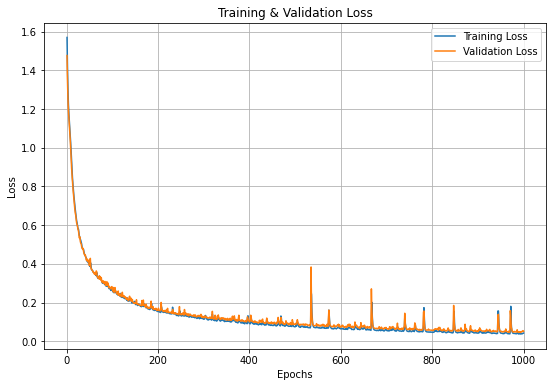

In [97]:
epochs = range(1, len(hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist.history['loss'])
plt.plot(epochs, hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

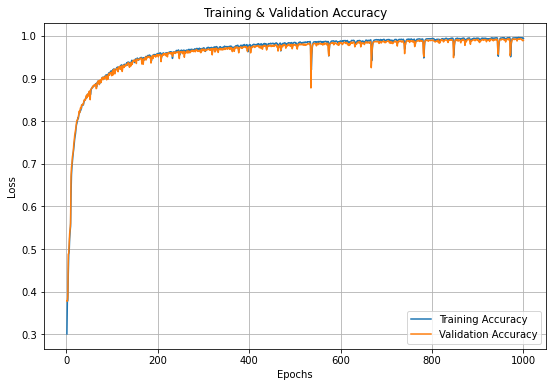

In [98]:
epochs = range(1, len(hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist.history['accuracy'])
plt.plot(epochs, hist.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

## 5) Model Evaluate 

In [99]:
loss, accuracy = model.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

2/2 [==============================] - 0s 15ms/step - loss: 0.0500 - accuracy: 0.9899
Loss = 0.05004
Accuracy = 0.98993


## 6) Model Save

In [100]:
abs_path = '/content/drive/MyDrive/Project/Project_Gotcha/models/'
model_name = 'lstm_1_june_16_50.h5'
final_path = abs_path + model_name

In [101]:
model.save(final_path)

# 3. Model Predict

## 1) Load Data

In [102]:
test_path = '/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/old/real_test.csv'

test_sample = pd.read_csv(test_path)
test_sample.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,index
0,131.090,158.404,104.906,183.220,110.116,183.185,162.316,193.695,204.122,201.516,97.0971,183.205,124.488,221.078,0.0,0.0,108.863,273.276,127.096,335.911,144.066,402.462,99.7320,270.668,110.185,329.394,97.0830,380.339,128.364,150.563,128.435,150.634,108.793,150.565,0.0,0.0,assault-punch_flip
1,131.075,153.246,104.930,183.228,110.141,183.186,162.346,198.904,206.708,202.745,97.1013,183.205,117.939,223.647,0.0,0.0,110.188,275.846,129.709,337.194,145.385,402.447,99.7283,273.283,110.202,329.406,97.0978,380.340,129.675,149.242,0.000,0.000,111.427,148.008,0.0,0.0,assault-punch_flip
2,131.052,153.234,107.520,183.257,115.369,183.250,163.639,205.435,205.419,202.846,97.0939,183.219,125.801,223.715,0.0,0.0,114.041,274.578,132.325,335.921,147.994,402.449,99.6768,271.959,111.434,329.372,98.3188,380.352,129.680,149.272,131.060,151.908,111.436,149.258,0.0,0.0,assault-punch_flip
3,137.531,153.186,110.139,183.290,120.575,184.531,158.432,222.338,198.883,213.235,99.6877,183.223,127.118,223.729,0.0,0.0,119.318,274.603,140.127,337.208,150.532,402.451,103.6160,271.968,114.061,328.141,97.1001,381.564,131.072,147.994,140.091,150.609,116.664,149.275,0.0,0.0,assault-punch_flip
4,140.158,153.219,111.470,183.291,121.878,184.541,149.284,224.998,192.374,223.621,101.0190,183.244,128.389,230.197,0.0,0.0,121.917,277.190,141.439,337.226,150.589,401.232,107.5290,275.861,117.926,329.426,98.3216,381.571,137.537,148.007,140.221,150.621,120.601,146.688,0.0,0.0,assault-punch_flip


In [103]:
test_sample = deleteJoint(test_sample)
test_sample = makeJointXY(test_sample)
test_sample = jointAngles(test_sample)

32it [00:00, 16314.30it/s]
32it [00:00, 41259.68it/s]
32it [00:00, 128931.54it/s]
32it [00:00, 106184.91it/s]
32it [00:00, 78033.56it/s]
32it [00:00, 101296.40it/s]
32it [00:00, 30643.32it/s]
32it [00:00, 106017.16it/s]
32it [00:00, 114520.25it/s]
32it [00:00, 108240.10it/s]
32it [00:00, 62397.83it/s]
32it [00:00, 84043.66it/s]
32it [00:00, 16422.09it/s]
100%|██████████| 32/32 [00:00<00:00, 112128.43it/s]


In [104]:
test_sample.head()

,index,Ang_RShoulder,Ang_RElbow,Ang_RHip,Ang_RKnee,Ang_LShoulder,Ang_LElbow,Ang_LHip,Ang_LKnee
0,assault-punch_flip,2.936190,-3.127849,-2.902233,-3.175192,-0.942728,-0.113306,-2.906344,-3.569468
1,assault-punch_flip,2.841084,-2.935511,-2.890232,-3.213897,-1.092086,0.009511,-2.899397,-3.577908
2,assault-punch_flip,2.709890,-2.648894,-2.923201,-3.199961,-0.950486,-0.104408,-2.851410,-3.595384
3,assault-punch_flip,-3.807971,-2.135505,-2.920881,-3.304341,-0.969132,-0.078561,-2.884323,-3.632855
4,assault-punch_flip,-3.997458,-2.134255,-2.938008,-3.313986,-1.038531,-0.019006,-2.907328,-3.692921


In [105]:
X_pre = makeX(test_sample)

X_pre.shape

100%|██████████| 32/32 [00:00<00:00, 27213.65it/s]


(1, 32, 8)

## 2) Load Model

In [106]:
from keras.models import load_model

np.set_printoptions(precision=6, suppress=True) # np.array 표현 방식 변경 (지수 -> 실수)

In [107]:
loaded_model = load_model(final_path)

In [108]:
predict_dict = {}

predictions = loaded_model.predict(X_pre)

for idx, c in enumerate(classes):
    predict_dict[c] = predictions[0][idx]

print(predict_dict)

{0: 0.008207416, 1: 0.002974391, 2: 0.9652065, 3: 0.0101480475, 4: 0.013463641}


In [109]:
predict_class = np.argmax(predictions[0], axis=-1)

classes[predict_class]

2